## Importing everything
And suppressing warnings :)

In [44]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, Polygon, LineString
import folium
from random import *
from tqdm import tqdm
import seaborn as sns
from geopy import distance

tqdm.pandas()

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

## Read all the GeoJSON files from Jakarta_POI.ipynb

In [45]:
df_osrm = gpd.read_file('data/jkt_OSRM.geojson')
df_gmaps = gpd.read_file('data/jkt_GMAPS.geojson')
df_osmnx = gpd.read_file('data/jkt_OSMNX.geojson')
df = pd.read_feather('data/matched_jkt.ftr')

df = df[df.apply(lambda x: all(x.location != np.array([0, 0])), axis=1)]

df_osrm.sort_values(by='trj_id', inplace=True)
df_gmaps.sort_values(by='trj_id', inplace=True)
df_osmnx.sort_values(by='trj_id', inplace=True)
df.sort_values(by=['trj_id', 'pingtimestamp'], inplace=True)

df_osrm.reset_index(drop=True, inplace=True)
df_gmaps.reset_index(drop=True, inplace=True)
df_osmnx.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [46]:
df_osrm

,trj_id,routes,osrm_dur,osrm_dist,geometry
0,10014,"{'route': [[-6.19519, 106.7972], [-6.18229, 10...",363.6,7510.6,"LINESTRING (106.79720 -6.19519, 106.79655 -6.1..."
1,10186,"{'route': [[-6.17073, 106.78725], [-6.17372, 1...",603.6,10433.0,"LINESTRING (106.78725 -6.17073, 106.78683 -6.1..."
2,10255,"{'route': [[-6.19034, 106.76257], [-6.19025, 1...",302.6,4701.1,"LINESTRING (106.76257 -6.19034, 106.76667 -6.1..."
3,10282,"{'route': [[-6.25918, 106.79689], [-6.26022, 1...",567.1,9915.8,"LINESTRING (106.79689 -6.25918, 106.79666 -6.2..."
4,10286,"{'route': [[-6.15126, 106.816], [-6.15128, 106...",370.9,4504.2,"LINESTRING (106.81600 -6.15126, 106.81699 -6.1..."
...,...,...,...,...,...
892,9636,"{'route': [[-6.14293, 106.78796], [-6.14307, 1...",285.5,5685.5,"LINESTRING (106.78796 -6.14293, 106.78755 -6.1..."
893,9765,"{'route': [[-6.14208, 106.80032], [-6.14191, 1...",148.9,2350.0,"LINESTRING (106.80032 -6.14208, 106.80343 -6.1..."
894,9844,"{'route': [[-6.24203, 106.84037], [-6.24217, 1...",123.9,2482.0,"LINESTRING (106.84037 -6.24203, 106.84100 -6.2..."
895,999,"{'route': [[-6.22088, 106.83223], [-6.22427, 1...",271.5,4277.6,"LINESTRING (106.83223 -6.22088, 106.83304 -6.2..."


In [47]:
df_gmaps

,trj_id,gdis,gdur,gdur_traffic,geometry
0,10014,7508,873,1217,"LINESTRING (106.79719 -6.19520, 106.79712 -6.1..."
1,10186,7849,979,1366,"LINESTRING (106.78732 -6.17077, 106.78751 -6.1..."
2,10255,4044,448,609,"LINESTRING (106.76257 -6.19032, 106.76537 -6.1..."
3,10282,9465,1252,1608,"LINESTRING (106.79685 -6.25918, 106.79675 -6.2..."
4,10286,4558,677,925,"LINESTRING (106.81600 -6.15129, 106.81701 -6.1..."
...,...,...,...,...,...
892,9636,5677,761,1197,"LINESTRING (106.78796 -6.14292, 106.78790 -6.1..."
893,9765,1438,184,322,"LINESTRING (106.80032 -6.14212, 106.79965 -6.1..."
894,9844,2495,325,385,"LINESTRING (106.84037 -6.24202, 106.84103 -6.2..."
895,999,4915,597,973,"LINESTRING (106.83222 -6.22088, 106.83253 -6.2..."


In [48]:
df_osmnx

,trj_id,osmnx_length,geometry
0,10014,3750.457506,"LINESTRING (106.79767 -6.19545, 106.79770 -6.1..."
1,10186,16967.311474,"LINESTRING (106.78733 -6.17074, 106.78716 -6.1..."
2,10255,5392.254356,"LINESTRING (106.76273 -6.19040, 106.76213 -6.1..."
3,10282,10430.894851,"LINESTRING (106.79713 -6.25908, 106.79716 -6.2..."
4,10286,7660.991620,"LINESTRING (106.81571 -6.15125, 106.81699 -6.1..."
...,...,...,...
892,9636,8556.318186,"LINESTRING (106.78755 -6.14307, 106.78756 -6.1..."
893,9765,1605.600651,"LINESTRING (106.80044 -6.14215, 106.80062 -6.1..."
894,9844,4149.648125,"LINESTRING (106.84040 -6.24204, 106.84046 -6.2..."
895,999,6669.499106,"LINESTRING (106.83221 -6.22083, 106.83215 -6.2..."


In [49]:
df

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day,month,year,day_of_week,location
0,10186,motorcycle,ios,1555581210,-6.170755,106.787247,3.48,1,5.0,2019-04-18 16:53:30+00:00,18,4,2019,3,"[106.787248, -6.170731]"
1,10186,motorcycle,ios,1555581211,-6.169763,106.787521,7.15,3,5.0,2019-04-18 16:53:31+00:00,18,4,2019,3,"[106.787423, -6.170158]"
2,10186,motorcycle,ios,1555581212,-6.169143,106.787598,3.55,344,5.0,2019-04-18 16:53:32+00:00,18,4,2019,3,"[106.787683, -6.169139]"
3,10186,motorcycle,ios,1555581213,-6.169040,106.787605,1.89,335,5.0,2019-04-18 16:53:33+00:00,18,4,2019,3,"[106.787678, -6.169037]"
4,10186,motorcycle,ios,1555581214,-6.168501,106.787651,6.75,340,5.0,2019-04-18 16:53:34+00:00,18,4,2019,3,"[106.787662, -6.168501]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121509,999,car,ios,1554689981,-6.215565,106.817566,7.16,224,10.0,2019-04-08 09:19:41+00:00,8,4,2019,0,"[106.817528, -6.215525]"
121510,999,car,ios,1554689982,-6.215604,106.817520,6.91,225,10.0,2019-04-08 09:19:42+00:00,8,4,2019,0,"[106.817484, -6.215567]"
121511,999,car,ios,1554689983,-6.215643,106.817474,7.00,225,10.0,2019-04-08 09:19:43+00:00,8,4,2019,0,"[106.817441, -6.215608]"
121512,999,car,ios,1554689984,-6.215685,106.817421,7.38,226,10.0,2019-04-08 09:19:44+00:00,8,4,2019,0,"[106.817392, -6.215655]"


In [50]:
df.shape, df[df.speed != 0].shape

((121514, 15), (120257, 15))

In [51]:
min_indices = []
max_indices = []
actual_routes = []
grouped = df.groupby("trj_id")
for name, group in tqdm(grouped):
    if not group.empty:
        min_indices.append(group.iloc[0].name)
        max_indices.append(group.iloc[-1].name)
        actual_routes.append(list(zip(group.rawlng, group.rawlat)))

df_start = df[df.index.isin(set(min_indices))].reset_index(drop=True)
df_end = df[df.index.isin(set(max_indices))].reset_index(drop=True)

100%|██████████| 55995/55995 [00:01<00:00, 46232.19it/s]


In [52]:
df_start

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day,month,year,day_of_week,location
0,10186,motorcycle,ios,1555581210,-6.170755,106.787247,3.480000,1,5.0,2019-04-18 16:53:30+00:00,18,4,2019,3,"[106.787248, -6.170731]"
1,10255,car,ios,1554821644,-6.190298,106.762566,7.973843,87,4.0,2019-04-09 21:54:04+00:00,9,4,2019,1,"[106.762568, -6.190339]"
2,10286,motorcycle,ios,1554979664,-6.151320,106.815994,6.780000,359,5.0,2019-04-11 17:47:44+00:00,11,4,2019,3,"[106.815996, -6.15126]"
3,10620,car,ios,1555317734,-6.173540,106.789513,7.680000,27,10.0,2019-04-15 15:42:14+00:00,15,4,2019,0,"[106.789338, -6.173456]"
4,10995,car,ios,1555169718,-6.143500,106.787987,4.550000,260,5.0,2019-04-13 22:35:18+00:00,13,4,2019,5,"[106.787983, -6.143472]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,9173,motorcycle,ios,1555414149,-6.210269,106.817917,2.020000,153,10.0,2019-04-16 18:29:09+00:00,16,4,2019,1,"[106.817894, -6.210269]"
198,9245,motorcycle,ios,1554851548,-6.219659,106.813873,10.310000,170,10.0,2019-04-10 06:12:28+00:00,10,4,2019,2,"[106.813898, -6.219666]"
199,9588,car,ios,1554789840,-6.168535,106.788383,5.990000,165,10.0,2019-04-09 13:04:00+00:00,9,4,2019,1,"[106.788467, -6.168548]"
200,9636,car,ios,1555670638,-6.142925,106.787964,4.480000,183,10.0,2019-04-19 17:43:58+00:00,19,4,2019,4,"[106.787964, -6.142925]"


In [53]:
df_end

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,time,day,month,year,day_of_week,location
0,10186,motorcycle,ios,1555582576,-6.203257,106.823425,10.490000,97,10.0,2019-04-18 17:16:16+00:00,18,4,2019,3,"[106.823441, -6.203175]"
1,10255,car,ios,1554822109,-6.189587,106.795097,11.106246,88,8.0,2019-04-09 22:01:49+00:00,9,4,2019,1,"[106.795096, -6.189563]"
2,10286,motorcycle,ios,1554980652,-6.125361,106.798851,5.700000,189,5.0,2019-04-11 18:04:12+00:00,11,4,2019,3,"[106.798851, -6.125346]"
3,10620,car,ios,1555318226,-6.166225,106.799477,7.450000,350,17.0,2019-04-15 15:50:26+00:00,15,4,2019,0,"[106.799471, -6.166157]"
4,10995,car,ios,1555170303,-6.166469,106.786736,11.660000,141,5.0,2019-04-13 22:45:03+00:00,13,4,2019,5,"[106.786739, -6.166447]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,9173,motorcycle,ios,1555415020,-6.166227,106.802322,3.420000,351,5.0,2019-04-16 18:43:40+00:00,16,4,2019,1,"[106.802269, -6.166576]"
198,9245,motorcycle,ios,1554852374,-6.265384,106.783623,14.060000,151,10.0,2019-04-10 06:26:14+00:00,10,4,2019,2,"[106.78369, -6.265383]"
199,9588,car,ios,1554790684,-6.242610,106.842880,2.620000,105,10.0,2019-04-09 13:18:04+00:00,9,4,2019,1,"[106.84288, -6.242602]"
200,9636,car,ios,1555671587,-6.176974,106.793724,8.760000,308,10.0,2019-04-19 17:59:47+00:00,19,4,2019,4,"[106.793697, -6.177003]"


## Create Folium Map
We want to see how each routes API perform, including the actual trajectory and the map matching result

In [54]:
# Adding lines to the different feature groups
for sample_trj_id in set(df.trj_id):
    jkt = folium.Map(location=list(map(lambda x: x[::-1], df_osrm[df_osrm.trj_id == str(sample_trj_id)].geometry.iloc[0].coords))[0], zoom_start=17, tiles='openstreetmap')

    # Creating feature groups
    f1 = folium.FeatureGroup("OSRM")
    f2 = folium.FeatureGroup("GMAPS")
    f3 = folium.FeatureGroup("OSMNX")
    f4 = folium.FeatureGroup("ACTUAL")
    f5 = folium.FeatureGroup("MM")

    temp = df[df.trj_id == str(sample_trj_id)]
    folium.vector_layers.PolyLine(list(map(lambda x: x[::-1], df_osrm[df_osrm.trj_id == str(sample_trj_id)].geometry.iloc[0].coords)), popup='<b>OSRM</b>', color='red', weight=3).add_to(f1)
    folium.vector_layers.PolyLine(list(map(lambda x: x[::-1], df_gmaps[df_gmaps.trj_id == str(sample_trj_id)].geometry.iloc[0].coords)), popup='<b>GMAPS</b>', color='green', weight=3).add_to(f2)
    folium.vector_layers.PolyLine(list(map(lambda x: x[::-1], df_osmnx[df_osmnx.trj_id == str(sample_trj_id)].geometry.iloc[0].coords)), popup='<b>OSMNX</b>', color='blue', weight=3).add_to(f3)
    folium.vector_layers.PolyLine(list(zip(list(temp['rawlat']), list(temp['rawlng']))), popup='<b>ACTUAL</b>', color='black', weight=3).add_to(f4)
    folium.vector_layers.PolyLine(list(map(lambda x: x[::-1], temp.location)), popup='<b>MM</b>', color='yellow', weight=3).add_to(f5)

    f1.add_to(jkt)
    f2.add_to(jkt)
    f3.add_to(jkt)
    f4.add_to(jkt)
    f5.add_to(jkt)
    folium.LayerControl().add_to(jkt)
    jkt.save(f'data/routes/matched/{sample_trj_id}.html')
jkt # sample

In [55]:
def get_distance(df, trj_id):
    temp = df[df.trj_id == trj_id]
    temp['nextrawlat'] = temp.rawlat.shift()
    temp['nextrawlng'] = temp.rawlng.shift()
    x = temp.iloc[1:].apply(lambda row: get_dist(row), axis=1)
    return sum(x)

def get_dist(row):
    return distance.distance((row.rawlat,row.rawlng), (row.nextrawlat, row.nextrawlng)).m

## Combining all routes

In [56]:
df_merged = df_gmaps[df_gmaps.trj_id.isin(df.trj_id)].copy()
df_merged.rename(columns={'geometry':'geometry_gmaps'}, inplace=True)
df_merged['osrmdur'] = df_osrm['osrm_dur']
df_merged['osrmdis'] = df_osrm['osrm_dist']
df_merged['osmnxdis'] = df_osmnx['osmnx_length']
df_merged = df_merged.sort_values(by='trj_id').reset_index(drop=True)
df_merged['starth'] = df_start['time'].apply(lambda x: x.hour)
df_merged['endh'] = df_end['time'].apply(lambda x: x.hour)
df_merged['actualdur'] = (df_end['time'] - df_start['time']).apply(lambda x: x.total_seconds())
df_merged['geometry_osrm'] = df_osrm['geometry']
df_merged['geometry_osmnx'] = df_osmnx['geometry']
df_merged['geometry_actual'] = list(map(LineString, actual_routes))

df_merged['day'] = df_start['day']
df_merged['osrmspeed'] = df_merged.apply(lambda x: 3.6*x['osrmdis']/x['osrmdur'], axis=1)
df_merged['gspeed'] = df_merged.apply(lambda x: 3.6*x['gdis']/x['gdur'], axis=1)
df_merged['actualdis'] = df_merged.apply(lambda x: get_distance(df, x.trj_id), axis=1)
df_merged['actualspeed'] = df_merged.apply(lambda x: 3.6*x['actualdis']/x['actualdur'], axis=1)

df_merged = df_merged[['trj_id', 'osmnxdis', 'osrmdis', 'gdis', 'actualdis', 'osrmdur', 'gdur', 'gdur_traffic', 'actualdur', 'osrmspeed', 'gspeed', 'actualspeed', 'starth', 'endh', 'day', 'geometry_osmnx', 'geometry_osrm', 'geometry_gmaps', 'geometry_actual']]
df_merged['trj_id'] = df_merged['trj_id'].astype('int32')
df_merged.head()

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,gspeed,actualspeed,starth,endh,day,geometry_osmnx,geometry_osrm,geometry_gmaps,geometry_actual
0,10186,16967.311474,10433.0,7849,7856.576317,603.6,979,1366,1366.0,62.224652,28.862513,20.705472,16,17,18,"LINESTRING (106.79767 -6.19545, 106.79770 -6.1...","LINESTRING (106.79720 -6.19519, 106.79655 -6.1...","LINESTRING (106.78732 -6.17077, 106.78751 -6.1...",LINESTRING (106.7872467041016 -6.1707553863525...
1,10255,5392.254356,4701.1,4044,4032.848615,302.6,448,609,465.0,55.928486,32.496429,31.222054,21,22,9,"LINESTRING (106.78733 -6.17074, 106.78716 -6.1...","LINESTRING (106.78725 -6.17073, 106.78683 -6.1...","LINESTRING (106.76257 -6.19032, 106.76537 -6.1...",LINESTRING (106.762565612793 -6.19029760360717...
2,10286,7660.991620,4504.2,4558,4592.783040,370.9,677,925,988.0,43.718307,24.237518,16.734837,17,18,11,"LINESTRING (106.76273 -6.19040, 106.76213 -6.1...","LINESTRING (106.76257 -6.19034, 106.76667 -6.1...","LINESTRING (106.81600 -6.15129, 106.81701 -6.1...",LINESTRING (106.8159942626953 -6.1513204574584...
3,10620,5171.606425,1610.8,2132,2496.910897,233.2,415,554,492.0,24.866552,18.494458,18.270080,15,15,15,"LINESTRING (106.79713 -6.25908, 106.79716 -6.2...","LINESTRING (106.79689 -6.25918, 106.79666 -6.2...","LINESTRING (106.78765 -6.16782, 106.78764 -6.1...",LINESTRING (106.7895126342773 -6.1735401153564...
4,10995,4850.560287,5005.2,5420,5407.879717,263.9,641,790,585.0,68.278590,30.439938,33.279260,22,22,13,"LINESTRING (106.81571 -6.15125, 106.81699 -6.1...","LINESTRING (106.81600 -6.15126, 106.81699 -6.1...","LINESTRING (106.78799 -6.14350, 106.78688 -6.1...",LINESTRING (106.7879867553711 -6.1435003280639...


In [57]:
df_osrm[df_osrm.trj_id == '8349'].routes.iloc[0]['route']
# http://router.project-osrm.org/route/v1/driving/106.91498,-6.14524;106.90961,-6.14821

[[-6.14524, 106.91498],
 [-6.1464, 106.91535],
 [-6.14811, 106.91568],
 [-6.14866, 106.91573],
 [-6.14868, 106.91474],
 [-6.14835, 106.9096],
 [-6.1483, 106.90941],
 [-6.1481, 106.90943],
 [-6.14815, 106.90962],
 [-6.14821, 106.90961]]

## Is weather a significant factor?
Doesn't seem like it, not many among the selected trajectories happened during the rain

In [58]:
weather = pd.read_csv('data/weather_jkt.csv')
df_merged['rain'] = df.apply(lambda x: int(any(weather[x.day == weather.day].rain)), axis=1)
df_merged

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,gspeed,actualspeed,starth,endh,day,geometry_osmnx,geometry_osrm,geometry_gmaps,geometry_actual,rain
0,10186,16967.311474,10433.0,7849,7856.576317,603.6,979,1366,1366.0,62.224652,28.862513,20.705472,16,17,18,"LINESTRING (106.79767 -6.19545, 106.79770 -6.1...","LINESTRING (106.79720 -6.19519, 106.79655 -6.1...","LINESTRING (106.78732 -6.17077, 106.78751 -6.1...",LINESTRING (106.7872467041016 -6.1707553863525...,0
1,10255,5392.254356,4701.1,4044,4032.848615,302.6,448,609,465.0,55.928486,32.496429,31.222054,21,22,9,"LINESTRING (106.78733 -6.17074, 106.78716 -6.1...","LINESTRING (106.78725 -6.17073, 106.78683 -6.1...","LINESTRING (106.76257 -6.19032, 106.76537 -6.1...",LINESTRING (106.762565612793 -6.19029760360717...,0
2,10286,7660.991620,4504.2,4558,4592.783040,370.9,677,925,988.0,43.718307,24.237518,16.734837,17,18,11,"LINESTRING (106.76273 -6.19040, 106.76213 -6.1...","LINESTRING (106.76257 -6.19034, 106.76667 -6.1...","LINESTRING (106.81600 -6.15129, 106.81701 -6.1...",LINESTRING (106.8159942626953 -6.1513204574584...,0
3,10620,5171.606425,1610.8,2132,2496.910897,233.2,415,554,492.0,24.866552,18.494458,18.270080,15,15,15,"LINESTRING (106.79713 -6.25908, 106.79716 -6.2...","LINESTRING (106.79689 -6.25918, 106.79666 -6.2...","LINESTRING (106.78765 -6.16782, 106.78764 -6.1...",LINESTRING (106.7895126342773 -6.1735401153564...,0
4,10995,4850.560287,5005.2,5420,5407.879717,263.9,641,790,585.0,68.278590,30.439938,33.279260,22,22,13,"LINESTRING (106.81571 -6.15125, 106.81699 -6.1...","LINESTRING (106.81600 -6.15126, 106.81699 -6.1...","LINESTRING (106.78799 -6.14350, 106.78688 -6.1...",LINESTRING (106.7879867553711 -6.1435003280639...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,9173,8257.200880,6900.9,6693,6565.544880,450.7,836,1116,871.0,55.121456,28.821531,27.136580,18,18,16,"LINESTRING (106.84064 -6.16307, 106.84087 -6.1...","LINESTRING (106.84071 -6.16296, 106.84912 -6.1...","LINESTRING (106.81794 -6.21027, 106.81794 -6.2...",LINESTRING (106.8179168701172 -6.2102694511413...,0
198,9245,12393.378887,8705.4,7910,7748.628068,494.0,1273,1844,826.0,63.440162,22.369207,33.771260,6,6,10,"LINESTRING (106.89196 -6.11015, 106.89195 -6.1...","LINESTRING (106.89169 -6.11014, 106.89000 -6.1...","LINESTRING (106.81390 -6.21967, 106.81385 -6.2...",LINESTRING (106.8138732910156 -6.2196588516235...,0
199,9588,12671.641743,10949.0,10945,10934.816902,461.0,704,2647,844.0,85.501952,55.968750,46.641399,13,13,9,"LINESTRING (106.78835 -6.17170, 106.78824 -6.1...","LINESTRING (106.78849 -6.17197, 106.78772 -6.1...","LINESTRING (106.78834 -6.16853, 106.78835 -6.1...",LINESTRING (106.7883834838867 -6.1685347557067...,0
200,9636,8556.318186,5685.5,5677,5870.274020,285.5,761,1197,949.0,71.691068,26.855716,22.268690,17,17,19,"LINESTRING (106.78082 -6.24161, 106.78083 -6.2...","LINESTRING (106.78082 -6.24164, 106.78083 -6.2...","LINESTRING (106.78796 -6.14292, 106.78790 -6.1...",LINESTRING (106.7879638671875 -6.1429247856140...,0


## Peak vs Non-peak Hours

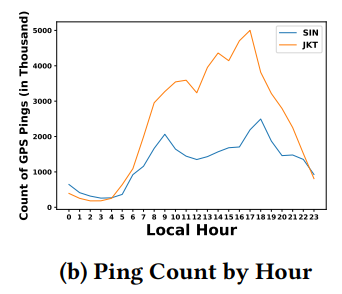

In [59]:
df_peak = df_merged[(13 <= df_merged.starth) & (df_merged.endh <= 18)]
df_nonpeak = df_merged[~(13 <= df_merged.starth) | ~(df_merged.endh <= 18)]

GMaps generally estimates a longer duration than OSRM.

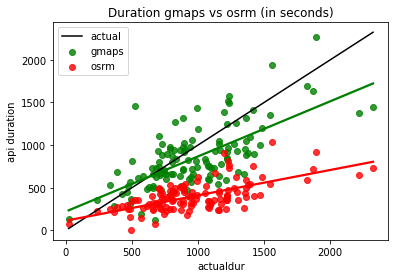

In [60]:
sns.lineplot(data=df_nonpeak, y='actualdur', x='actualdur', color='black', label='actual')
sns.regplot(data=df_nonpeak, y='gdur', x='actualdur', color='green', label='gmaps', ci=None)
fig = sns.regplot(data=df_nonpeak, y='osrmdur', x='actualdur', color='red', label='osrm', ci=None)
fig.set_ylabel('api duration')
fig.set_title('Duration gmaps vs osrm (in seconds)')
fig.legend()

Is the gdur_traffic column useful?

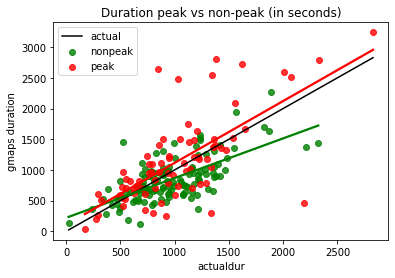

In [61]:
sns.lineplot(data=df_merged, y='actualdur', x='actualdur', color='black', label='actual')
sns.regplot(data=df_nonpeak, y='gdur', x='actualdur', color='green', label='nonpeak', ci=None)
fig = sns.regplot(data=df_peak, y='gdur_traffic', x='actualdur', color='red', label='peak', ci=None)
fig.set_ylabel('gmaps duration')
fig.set_title('Duration peak vs non-peak (in seconds)')
fig.legend()

GMaps tend to estimate the actual distance better than OSRM

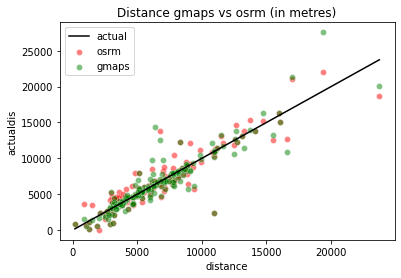

In [62]:
sns.lineplot(data=df_merged, y='actualdis', x='actualdis', color='black', label='actual')
sns.scatterplot(data=df_merged, x='actualdis', y='osrmdis', color='red', label='osrm', alpha=0.5)
#sns.regplot(data=df_merged, x='actualdis', y='osmnxdis', color='blue')
fig = sns.scatterplot(data=df_merged, x='actualdis', y='gdis', color='green', label='gmaps', alpha=0.5)
fig.set_xlabel('distance')
fig.set_title('Distance gmaps vs osrm (in metres)')
fig.legend()

Still hard to see the short distances, let's cut the long ones

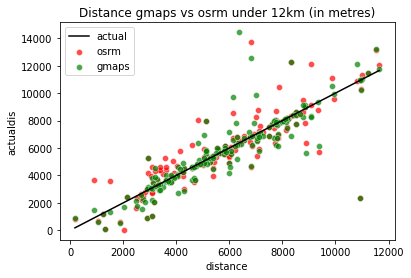

In [63]:
df_merged_cut = df_merged[df_merged.actualdis < 12000]
sns.lineplot(data=df_merged_cut, y='actualdis', x='actualdis', color='black', label='actual')
sns.scatterplot(data=df_merged_cut, x='actualdis', y='osrmdis', color='red', label='osrm', alpha=0.7)
fig = sns.scatterplot(data=df_merged_cut, x='actualdis', y='gdis', color='green', label='gmaps', alpha=0.7)
fig.set_xlabel('distance')
fig.set_title('Distance gmaps vs osrm under 12km (in metres)')
fig.legend()

Distribution of the actual average speed during peak vs non-peak hours

Text(0.5, 1.0, 'Speed (in kph)')

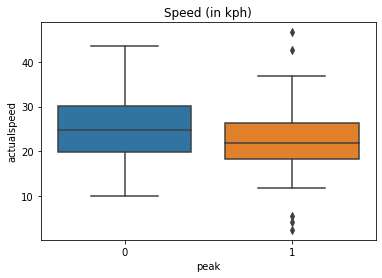

In [64]:
df_peak['peak'] = 1
df_nonpeak['peak'] = 0
df_pnp = pd.concat([df_peak, df_nonpeak])
fig = sns.boxplot(data=df_pnp, x='peak', y='actualspeed')
fig.set_title('Speed (in kph)')

Which route estimates the speed better?

In [65]:
df_peak_melt = pd.melt(df_peak, id_vars=['trj_id'], value_vars=['gspeed', 'osrmspeed', 'actualspeed'])
df_nonpeak_melt = pd.melt(df_nonpeak, id_vars=['trj_id'], value_vars=['gspeed', 'osrmspeed', 'actualspeed'])

Text(0, 0.5, 'speed')

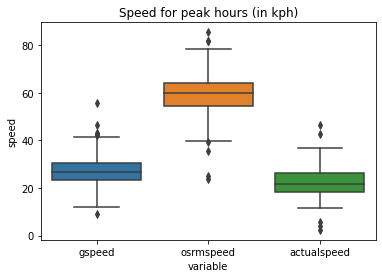

In [66]:
fig = sns.boxplot(data=df_peak_melt, x='variable', y='value')
fig.set_title('Speed for peak hours (in kph)')
fig.set_ylabel('speed')

Text(0, 0.5, 'speed')

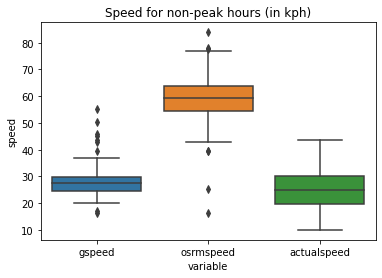

In [67]:
fig = sns.boxplot(data=df_nonpeak_melt, x='variable', y='value')
fig.set_title('Speed for non-peak hours (in kph)')
fig.set_ylabel('speed')

In [68]:
df_peak.describe()

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,gspeed,actualspeed,starth,endh,day,rain,peak
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.0,79.0
mean,40138.202532,8927.813505,6343.859494,6212.354430,6403.189966,380.741772,753.936709,1137.329114,1022.075949,58.487952,27.877792,22.376762,15.405063,15.645570,14.341772,0.0,1.0
std,25079.424123,7181.513771,4136.438542,4494.683543,4116.765113,225.306052,406.260695,696.529303,482.521443,10.905229,7.621620,7.404887,1.581293,1.609571,4.153732,0.0,0.0
min,2644.000000,162.013394,129.700000,130.000000,892.897540,5.700000,39.000000,42.000000,172.000000,23.902460,8.943498,2.411426,13.000000,13.000000,8.000000,0.0,1.0
25%,18092.000000,3704.826201,3597.200000,3322.500000,3350.811525,250.650000,496.000000,684.500000,708.000000,54.362972,23.197602,18.348578,14.000000,14.000000,10.000000,0.0,1.0
50%,38573.000000,7371.409399,5361.900000,5248.000000,5666.114671,331.200000,703.000000,974.000000,944.000000,59.840816,26.874538,21.858544,15.000000,16.000000,15.000000,0.0,1.0
75%,59762.000000,11947.367028,7682.350000,7878.000000,8074.656992,448.800000,934.000000,1402.000000,1293.000000,64.142846,30.718686,26.395157,17.000000,17.000000,18.000000,0.0,1.0
max,83984.000000,40270.557137,22064.600000,27578.000000,23736.085825,1324.500000,2355.000000,3242.000000,2828.000000,85.501952,55.968750,46.641399,18.000000,18.000000,21.000000,0.0,1.0


In [69]:
df_nonpeak.describe()

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,gspeed,actualspeed,starth,endh,day,rain,peak
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.0
mean,44344.398374,9577.673769,6715.439024,6674.959350,6630.280003,401.366667,845.934959,1270.089431,967.024390,59.016042,28.078970,25.298081,14.032520,14.284553,13.991870,0.0,0.0
std,24808.124234,6276.693458,3219.050354,3292.321214,3100.600707,172.002203,360.100868,632.520459,373.355464,9.648409,5.851626,7.637819,5.910445,5.955464,4.230056,0.0,0.0
min,999.000000,85.565615,27.000000,862.000000,178.224623,6.000000,121.000000,157.000000,23.000000,16.200000,16.243432,10.021505,0.000000,0.000000,8.000000,0.0,0.0
25%,21200.500000,5460.823305,4670.050000,4567.500000,4626.638330,286.250000,630.000000,846.000000,717.500000,54.607976,24.670563,19.791640,10.000000,10.000000,10.000000,0.0,0.0
50%,44366.000000,7971.422313,6131.300000,6147.000000,6066.755827,366.800000,799.000000,1167.000000,920.000000,59.270179,27.476680,24.789562,12.000000,12.000000,14.000000,0.0,0.0
75%,65065.000000,11925.159072,8024.550000,7941.000000,7819.825917,484.100000,991.000000,1516.000000,1210.000000,63.686521,29.654287,30.089747,20.000000,20.000000,18.000000,0.0,0.0
max,83824.000000,31855.325662,21127.100000,21373.000000,16964.288031,1039.100000,2264.000000,4019.000000,2323.000000,83.914172,55.207509,43.523720,23.000000,23.000000,22.000000,0.0,0.0


## Use Terry's route classification

In [70]:
def find_distance_approx(trj_id):
    temp = df[df.trj_id == str(trj_id)]
    temp2 = (df_merged[df_merged.trj_id == trj_id]).iloc[0]
    
    osrm_dist_list = temp.apply(lambda x: temp2.geometry_osrm.distance(Point(x.rawlng, x.rawlat)), axis=1)
    osrm_count = len(list(filter(lambda x: x <= 10**(-4), osrm_dist_list)))

    gmaps_dist_list = temp.apply(lambda x: temp2.geometry_gmaps.distance(Point(x.rawlng, x.rawlat)), axis=1)
    gmaps_count = len(list(filter(lambda x: x <= 10**(-4), gmaps_dist_list)))

    return ( trj_id, (osrm_count/len(temp))*100 , (gmaps_count/len(temp))*100 )

In [71]:
find_distance_approx(999)

(999, 0.0, 51.515151515151516)

In [72]:
results = list(map(lambda x: find_distance_approx(x), tqdm(df_merged.trj_id)))
temp = []
for i in results:
    if i[1] <= 80 and i[2] <= 80:
        temp.append((i[0], "Others"))
    else:
        if i[1] >= i[2]:
            temp.append((i[0], "OSRM"))
        else:
            temp.append((i[0], "GMAPS"))

results = temp

100%|██████████| 202/202 [00:07<00:00, 26.07it/s]


In [73]:
results = pd.DataFrame(results, columns = ["trj_id", "same_route"])

In [74]:
merged_df_2 = df_merged.copy()
merged_df_2 = pd.merge(df_merged, results, on="trj_id")
merged_df_2

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,...,actualspeed,starth,endh,day,geometry_osmnx,geometry_osrm,geometry_gmaps,geometry_actual,rain,same_route
0,10186,16967.311474,10433.0,7849,7856.576317,603.6,979,1366,1366.0,62.224652,...,20.705472,16,17,18,"LINESTRING (106.79767 -6.19545, 106.79770 -6.1...","LINESTRING (106.79720 -6.19519, 106.79655 -6.1...","LINESTRING (106.78732 -6.17077, 106.78751 -6.1...",LINESTRING (106.7872467041016 -6.1707553863525...,0,Others
1,10255,5392.254356,4701.1,4044,4032.848615,302.6,448,609,465.0,55.928486,...,31.222054,21,22,9,"LINESTRING (106.78733 -6.17074, 106.78716 -6.1...","LINESTRING (106.78725 -6.17073, 106.78683 -6.1...","LINESTRING (106.76257 -6.19032, 106.76537 -6.1...",LINESTRING (106.762565612793 -6.19029760360717...,0,GMAPS
2,10286,7660.991620,4504.2,4558,4592.783040,370.9,677,925,988.0,43.718307,...,16.734837,17,18,11,"LINESTRING (106.76273 -6.19040, 106.76213 -6.1...","LINESTRING (106.76257 -6.19034, 106.76667 -6.1...","LINESTRING (106.81600 -6.15129, 106.81701 -6.1...",LINESTRING (106.8159942626953 -6.1513204574584...,0,GMAPS
3,10620,5171.606425,1610.8,2132,2496.910897,233.2,415,554,492.0,24.866552,...,18.270080,15,15,15,"LINESTRING (106.79713 -6.25908, 106.79716 -6.2...","LINESTRING (106.79689 -6.25918, 106.79666 -6.2...","LINESTRING (106.78765 -6.16782, 106.78764 -6.1...",LINESTRING (106.7895126342773 -6.1735401153564...,0,Others
4,10995,4850.560287,5005.2,5420,5407.879717,263.9,641,790,585.0,68.278590,...,33.279260,22,22,13,"LINESTRING (106.81571 -6.15125, 106.81699 -6.1...","LINESTRING (106.81600 -6.15126, 106.81699 -6.1...","LINESTRING (106.78799 -6.14350, 106.78688 -6.1...",LINESTRING (106.7879867553711 -6.1435003280639...,0,GMAPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,9173,8257.200880,6900.9,6693,6565.544880,450.7,836,1116,871.0,55.121456,...,27.136580,18,18,16,"LINESTRING (106.84064 -6.16307, 106.84087 -6.1...","LINESTRING (106.84071 -6.16296, 106.84912 -6.1...","LINESTRING (106.81794 -6.21027, 106.81794 -6.2...",LINESTRING (106.8179168701172 -6.2102694511413...,0,GMAPS
198,9245,12393.378887,8705.4,7910,7748.628068,494.0,1273,1844,826.0,63.440162,...,33.771260,6,6,10,"LINESTRING (106.89196 -6.11015, 106.89195 -6.1...","LINESTRING (106.89169 -6.11014, 106.89000 -6.1...","LINESTRING (106.81390 -6.21967, 106.81385 -6.2...",LINESTRING (106.8138732910156 -6.2196588516235...,0,Others
199,9588,12671.641743,10949.0,10945,10934.816902,461.0,704,2647,844.0,85.501952,...,46.641399,13,13,9,"LINESTRING (106.78835 -6.17170, 106.78824 -6.1...","LINESTRING (106.78849 -6.17197, 106.78772 -6.1...","LINESTRING (106.78834 -6.16853, 106.78835 -6.1...",LINESTRING (106.7883834838867 -6.1685347557067...,0,GMAPS
200,9636,8556.318186,5685.5,5677,5870.274020,285.5,761,1197,949.0,71.691068,...,22.268690,17,17,19,"LINESTRING (106.78082 -6.24161, 106.78083 -6.2...","LINESTRING (106.78082 -6.24164, 106.78083 -6.2...","LINESTRING (106.78796 -6.14292, 106.78790 -6.1...",LINESTRING (106.7879638671875 -6.1429247856140...,0,GMAPS


In [75]:
merged_df_2[merged_df_2.same_route == 'Others'].head()

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,...,actualspeed,starth,endh,day,geometry_osmnx,geometry_osrm,geometry_gmaps,geometry_actual,rain,same_route
0,10186,16967.311474,10433.0,7849,7856.576317,603.6,979,1366,1366.0,62.224652,...,20.705472,16,17,18,"LINESTRING (106.79767 -6.19545, 106.79770 -6.1...","LINESTRING (106.79720 -6.19519, 106.79655 -6.1...","LINESTRING (106.78732 -6.17077, 106.78751 -6.1...",LINESTRING (106.7872467041016 -6.1707553863525...,0,Others
3,10620,5171.606425,1610.8,2132,2496.910897,233.2,415,554,492.0,24.866552,...,18.270080,15,15,15,"LINESTRING (106.79713 -6.25908, 106.79716 -6.2...","LINESTRING (106.79689 -6.25918, 106.79666 -6.2...","LINESTRING (106.78765 -6.16782, 106.78764 -6.1...",LINESTRING (106.7895126342773 -6.1735401153564...,0,Others
5,11293,14356.017863,7469.5,6737,7696.080962,446.2,919,1366,896.0,60.264904,...,30.921754,12,12,14,"LINESTRING (106.78770 -6.16796, 106.78844 -6.1...","LINESTRING (106.78766 -6.16782, 106.78766 -6.1...","LINESTRING (106.81915 -6.15712, 106.81867 -6.1...",LINESTRING (106.8191528320312 -6.1571216583251...,0,Others
7,12433,9629.337914,6914.1,6916,7106.740004,489.2,983,1166,890.0,50.880540,...,28.746364,18,19,18,"LINESTRING (106.82253 -6.17335, 106.82176 -6.1...","LINESTRING (106.82253 -6.17301, 106.82253 -6.1...","LINESTRING (106.86677 -6.13845, 106.86410 -6.1...",LINESTRING (106.8667755126953 -6.1384863853454...,0,Others
9,13434,13289.172600,8593.7,8608,8493.836200,479.7,1025,1855,893.0,64.493058,...,34.241669,1,1,11,"LINESTRING (106.78806 -6.14346, 106.79036 -6.1...","LINESTRING (106.78798 -6.14347, 106.78629 -6.1...","LINESTRING (106.82034 -6.19467, 106.82022 -6.1...","LINESTRING (106.8203125 -6.194704055786133, 10...",0,Others


In [76]:
merged_df_2['peak'] = merged_df_2.apply(lambda x: int((13 <= x.starth) & (x.endh <= 18)), axis=1)
merged_df_2.head()

,trj_id,osmnxdis,osrmdis,gdis,actualdis,osrmdur,gdur,gdur_traffic,actualdur,osrmspeed,...,starth,endh,day,geometry_osmnx,geometry_osrm,geometry_gmaps,geometry_actual,rain,same_route,peak
0,10186,16967.311474,10433.0,7849,7856.576317,603.6,979,1366,1366.0,62.224652,...,16,17,18,"LINESTRING (106.79767 -6.19545, 106.79770 -6.1...","LINESTRING (106.79720 -6.19519, 106.79655 -6.1...","LINESTRING (106.78732 -6.17077, 106.78751 -6.1...",LINESTRING (106.7872467041016 -6.1707553863525...,0,Others,1
1,10255,5392.254356,4701.1,4044,4032.848615,302.6,448,609,465.0,55.928486,...,21,22,9,"LINESTRING (106.78733 -6.17074, 106.78716 -6.1...","LINESTRING (106.78725 -6.17073, 106.78683 -6.1...","LINESTRING (106.76257 -6.19032, 106.76537 -6.1...",LINESTRING (106.762565612793 -6.19029760360717...,0,GMAPS,0
2,10286,7660.991620,4504.2,4558,4592.783040,370.9,677,925,988.0,43.718307,...,17,18,11,"LINESTRING (106.76273 -6.19040, 106.76213 -6.1...","LINESTRING (106.76257 -6.19034, 106.76667 -6.1...","LINESTRING (106.81600 -6.15129, 106.81701 -6.1...",LINESTRING (106.8159942626953 -6.1513204574584...,0,GMAPS,1
3,10620,5171.606425,1610.8,2132,2496.910897,233.2,415,554,492.0,24.866552,...,15,15,15,"LINESTRING (106.79713 -6.25908, 106.79716 -6.2...","LINESTRING (106.79689 -6.25918, 106.79666 -6.2...","LINESTRING (106.78765 -6.16782, 106.78764 -6.1...",LINESTRING (106.7895126342773 -6.1735401153564...,0,Others,1
4,10995,4850.560287,5005.2,5420,5407.879717,263.9,641,790,585.0,68.278590,...,22,22,13,"LINESTRING (106.81571 -6.15125, 106.81699 -6.1...","LINESTRING (106.81600 -6.15126, 106.81699 -6.1...","LINESTRING (106.78799 -6.14350, 106.78688 -6.1...",LINESTRING (106.7879867553711 -6.1435003280639...,0,GMAPS,0


In [77]:
# No one obeys OSRM :)
df_obey_gmaps = merged_df_2[merged_df_2.same_route == 'GMAPS']
df_obey_others = merged_df_2[merged_df_2.same_route == 'Others']

In [78]:
df_obey_gmaps.shape, df_obey_others.shape

((75, 22), (127, 22))

In [79]:
merged_df_2.to_csv('data/merged_routes.csv', index=False)

### Speed distribution between routes that obey GMaps VS their own way

For peak hours, there is actually an outlier which might be caused by the usage of the highway/expressway, or due to the fact that the peak hours affect the traffic so the speed becomes extremely slow.

The reason why there isn't any high outlier for non-peak hours could be that not many trajectories go through the expressway due to safety (and/or it's still the night).

Text(0.5, 1.0, 'Non-peak hours')

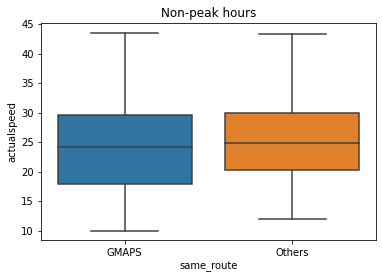

In [80]:
fig = sns.boxplot(data=merged_df_2[merged_df_2.peak == 0], x='same_route', y='actualspeed')
fig.set_title('Non-peak hours')

Text(0.5, 1.0, 'Peak hours (1-6 PM)')

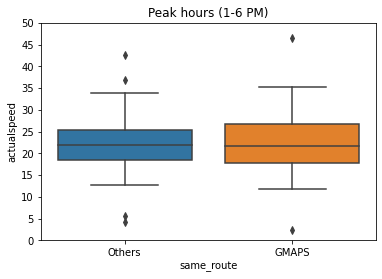

In [81]:
fig = sns.boxplot(data=merged_df_2[merged_df_2.peak == 1], x='same_route', y='actualspeed')
fig.set_yticks(list(range(0, 55, 5)))
fig.set_title('Peak hours (1-6 PM)')

Given a driver uses another route, does it achieve its destination faster than what Google Maps predicts?

Text(0.5, 1.0, 'Other routes comparison')

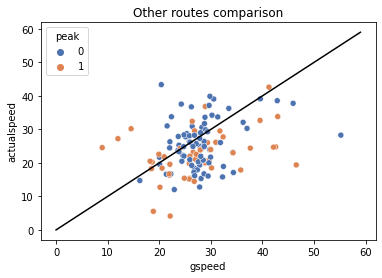

In [82]:
sns.lineplot(x=list(range(60)), y=list(range(60)), color='black')
fig = sns.scatterplot(data=df_obey_others, x='gspeed', y='actualspeed', hue='peak', palette="deep")
fig.set_title('Other routes comparison')

Seems like most of the points lie under the black line, which suggests the driver could've been faster by obeying GMaps.

For now this part is unused, but might come in handy ;)

In [83]:
#f = pd.read_feather('data/processed_jkt.ftr')
#g = pd.read_feather('data/matched_jkt.ftr')[['trj_id', 'pingtimestamp', 'location']]
#g = f.merge(g, on=['trj_id', 'pingtimestamp'], how='inner')
#g.sort_values(by=['trj_id', 'pingtimestamp'], inplace=True)
#g.reset_index(drop=True).to_feather('data/matched_jkt.ftr')
#g

In [84]:
df_delta = df_merged[['trj_id', 'osrmdis', 'gdis', 'actualdis']]
df_delta['osrmdelta'] = abs(df_delta.osrmdis - df_delta.actualdis)
df_delta['gdelta'] = abs(df_delta.gdis - df_delta.actualdis)
df_delta['gwins'] = df_delta['gdelta'] < df_delta['osrmdelta']
#print(sum(df_delta.gwins))
df_delta[~df_delta.gwins]

,trj_id,osrmdis,gdis,actualdis,osrmdelta,gdelta,gwins
5,11293,7469.5,6737,7696.080962,226.580962,959.080962,False
6,1241,6294.5,14437,6359.299043,64.799043,8077.700957,False
9,13434,8593.7,8608,8493.836200,99.863800,114.163800,False
11,1406,5826.9,5938,5590.929213,235.970787,347.070787,False
16,14594,6163.9,6170,5827.865906,336.034094,342.134094,False
...,...,...,...,...,...,...,...
193,83984,22064.6,27578,19409.594637,2655.005363,8168.405363,False
194,8647,4842.8,4838,4901.960086,59.160086,63.960086,False
196,9147,5796.3,5802,5798.554172,2.254172,3.445828,False
200,9636,5685.5,5677,5870.274020,184.774020,193.274020,False
